In [3]:
pip install scanpy

     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 11.2 MB 39.7 MB/s 
     |████████████████████████████████| 88 kB 5.8 MB/s 
     |████████████████████████████████| 96 kB 4.6 MB/s 
     |████████████████████████████████| 930 kB 50.3 MB/s 
     |████████████████████████████████| 1.1 MB 45.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=0bcc682ed356844a32565c1a75305a65126c4fede9ac507ab8cc0d414c292507
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=480cd98c48b64432a52f1f6a8f6ec8a66a8bd41bab6d76f3fbefee7f498d401f
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for session-info: filename=session_info-1.0.0-py3-no

In [4]:
!pip install git+https://github.com/pcahan1/PySingleCellNet/

  Cloning https://github.com/pcahan1/PySingleCellNet/ to /tmp/pip-req-build-f7tj0h12
  Running command git clone -q https://github.com/pcahan1/PySingleCellNet/ /tmp/pip-req-build-f7tj0h12
  Created wheel for pySingleCellNet: filename=pySingleCellNet-0.1-py3-none-any.whl size=15672 sha256=eba833c5f3b6532471d891b4414ceb44e9f01c7f33982be244180a23a34076cc
  Stored in directory: /tmp/pip-ephem-wheel-cache-h37ykz__/wheels/5c/f3/8b/9b77863a37aa6f582dbf8fee86228ad6692bc02904c8a586be
Successfully built pySingleCellNet


In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import scanpy as sc
import scipy as sp
import numpy as np
import anndata
import pySingleCellNet as pySCN
sns.set_style('white')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import drive
drive.mount('gdrive/',force_remount=True)

DATAPATH1 = "gdrive/My Drive/direct_conversion_subsampled_5k_raw.h5ad"
DATAPATH2 = "gdrive/My Drive/TM_FACS_heart.h5ad"
DATAPATH3 = "gdrive/My Drive/Kannan_perinatal_reference.h5ad"
DATAPATH4 = 'gdrive/My Drive/hIPSC_CM_orlova_GSM4443382.h5ad'
DATAPATH5 = 'gdrive/My Drive/clusters.tsv'

Mounted at gdrive/


In [7]:
adata_mcm_raw = sc.read_h5ad(DATAPATH1)
adata_tabmuris=sc.read_h5ad(DATAPATH2)
refdat = sc.read_h5ad(DATAPATH3)
human = sc.read_h5ad(DATAPATH4)
clust = pd.read_csv(DATAPATH5,sep='\t')

In [19]:
clust

,cell.id,celltype
0,rep1_AAACCTGAGAAGGTTT-1,Cardiomyocytes
1,rep1_AAACCTGAGCATCATC-1,Cardiomyocytes
2,rep1_AAACCTGCAGACGTAG-1,Other
3,rep1_AAACCTGGTCGTGGCT-1,Other
4,rep1_AAACCTGGTTTCGCTC-1,Cardiomyocytes
...,...,...
3597,rep1_TTTGGTTTCTCTGAGA-1,Cardiomyocytes
3598,rep1_TTTGGTTTCTGTGCAA-1,Cardiomyocytes
3599,rep1_TTTGTCAGTCTCCACT-1,Other
3600,rep1_TTTGTCATCCTACAGA-1,Cardiomyocytes


In [20]:
for i in range(0,3602):
  clust['cell.id'][i] = clust['cell.id'][i][5:]

clust

,cell.id,celltype
0,AAACCTGAGAAGGTTT-1,Cardiomyocytes
1,AAACCTGAGCATCATC-1,Cardiomyocytes
2,AAACCTGCAGACGTAG-1,Other
3,AAACCTGGTCGTGGCT-1,Other
4,AAACCTGGTTTCGCTC-1,Cardiomyocytes
...,...,...
3597,TTTGGTTTCTCTGAGA-1,Cardiomyocytes
3598,TTTGGTTTCTGTGCAA-1,Cardiomyocytes
3599,TTTGTCAGTCTCCACT-1,Other
3600,TTTGTCATCCTACAGA-1,Cardiomyocytes


In [28]:
human.obs.loc[clust['cell.id'][clust['celltype'] == 'Cardiomyocytes']]

""
AAACCTGAGAAGGTTT-1
AAACCTGAGCATCATC-1
AAACCTGGTTTCGCTC-1
AAACGGGAGCCGCCTA-1
AAACGGGGTGAAGGCT-1
...
TTTGGTTGTTTCGCTC-1
TTTGGTTTCTAACGGT-1
TTTGGTTTCTCTGAGA-1
TTTGGTTTCTGTGCAA-1


In [30]:
human.var_names

Index(['RP11-34P13.3', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'RP11-34P13.14', 'RP11-34P13.9', 'FO538757.3', 'FO538757.2',
       'AP006222.2',
       ...
       'AC007325.2', 'BX072566.1', 'AL354822.1', 'AC023491.2', 'AC004556.1',
       'AC233755.2', 'AC233755.1', 'AC240274.1', 'AC213203.1', 'FAM231B'],
      dtype='object', length=33694)

In [49]:
genelist = refdat.var_names.to_list()
for i in range(len(genelist)):
  genelist[i] = str.upper(genelist[i])

In [52]:
refdat.var_names = genelist

In [57]:
genesTrain = refdat.var_names
genesQuery = human.var_names
cgenes = genesTrain.intersection(genesQuery)
print(cgenes)

Index(['GNAI3', 'CDC45', 'SCML2', 'APOH', 'NARF', 'CAV2', 'KLF6', 'SCMH1',
       'COX5A', 'TBX2',
       ...
       'NUDT8', 'BTBD8', 'RNF212B', 'SNHG10', 'SCAMP4', 'HIST1H2BM',
       'HIST1H2BH', 'PNP', 'EPPK1', 'VPS28'],
      dtype='object', length=14569)


In [58]:
adata_reference_cgene = refdat[:,cgenes]
human_cgene = human[:,cgenes].copy()

In [60]:
adata_reference_cgene

View of AnnData object with n_obs × n_vars = 936 × 14569
    obs: 'i7', 'cellbarcode', 'column', 'timepoint', 'genes', 'umis', 'ERCC_percent', 'reads'

In [61]:
expTrain, expVal = pySCN.splitCommonAnnData(adata_reference_cgene, ncells=200,dLevel='timepoint')

/usr/local/lib/python3.7/dist-packages/pySingleCellNet/utils.py:22: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[cellid] = adata.obs.index


p11 : 
93
p35 : 
91
p22 : 
92
p8 : 
82
e14 : 
72
p14 : 
92
p28 : 
77
e18 : 
83
p18 : 
89
p4 : 
36
p0 : 
35
p56 : 
94


In [62]:
[cgenesA, xpairs, tspRF] = pySCN.scn_train(expTrain, nTopGenes = 100, nRand = 0,
                                           nTrees = 1000 ,nTopGenePairs = 100, dLevel = 'timepoint', 
                                           stratify=True, limitToHVG=True)

HVG
Matrix normalized
There are  1214  classification genes

e14
e18
p0
p11
p14
p18
p22
p28
p35
p4
p56
p8
There are 1160 top gene pairs

Finished pair transforming the data



In [63]:
human_classified = pySCN.scn_classify(human_cgene, cgenesA, xpairs, tspRF, nrand = 0)

In [65]:
human_classified.obs

,SCN_class
AAACCTGAGAAGGTTT-1,e14
AAACCTGAGCATCATC-1,e14
AAACCTGCAGACGTAG-1,e14
AAACCTGGTCGTGGCT-1,e14
AAACCTGGTTTCGCTC-1,e14
...,...
TTTGGTTTCTCTGAGA-1,p0
TTTGGTTTCTGTGCAA-1,p8
TTTGTCAGTCTCCACT-1,e14
TTTGTCATCCTACAGA-1,e14


In [67]:
human_classified.obs['SCN_class'].unique()

array(['e14', 'e18', 'p0', 'p8', 'p4', 'p35'], dtype=object)

In [69]:
props=[]
for i in human_classified.obs['SCN_class'].unique():
  props.append(sum(human_classified.obs['SCN_class']==i))

In [72]:
props = props/np.sum(props)

In [73]:
props

array([0.69808219, 0.00465753, 0.16767123, 0.12767123, 0.00109589,
       0.00082192])

In [75]:
human_classified.obs['SCN_class'].unique()

array(['e14', 'e18', 'p0', 'p8', 'p4', 'p35'], dtype=object)

In [77]:
pip install matplotlib==3.1.3 

     |████████████████████████████████| 13.1 MB 4.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

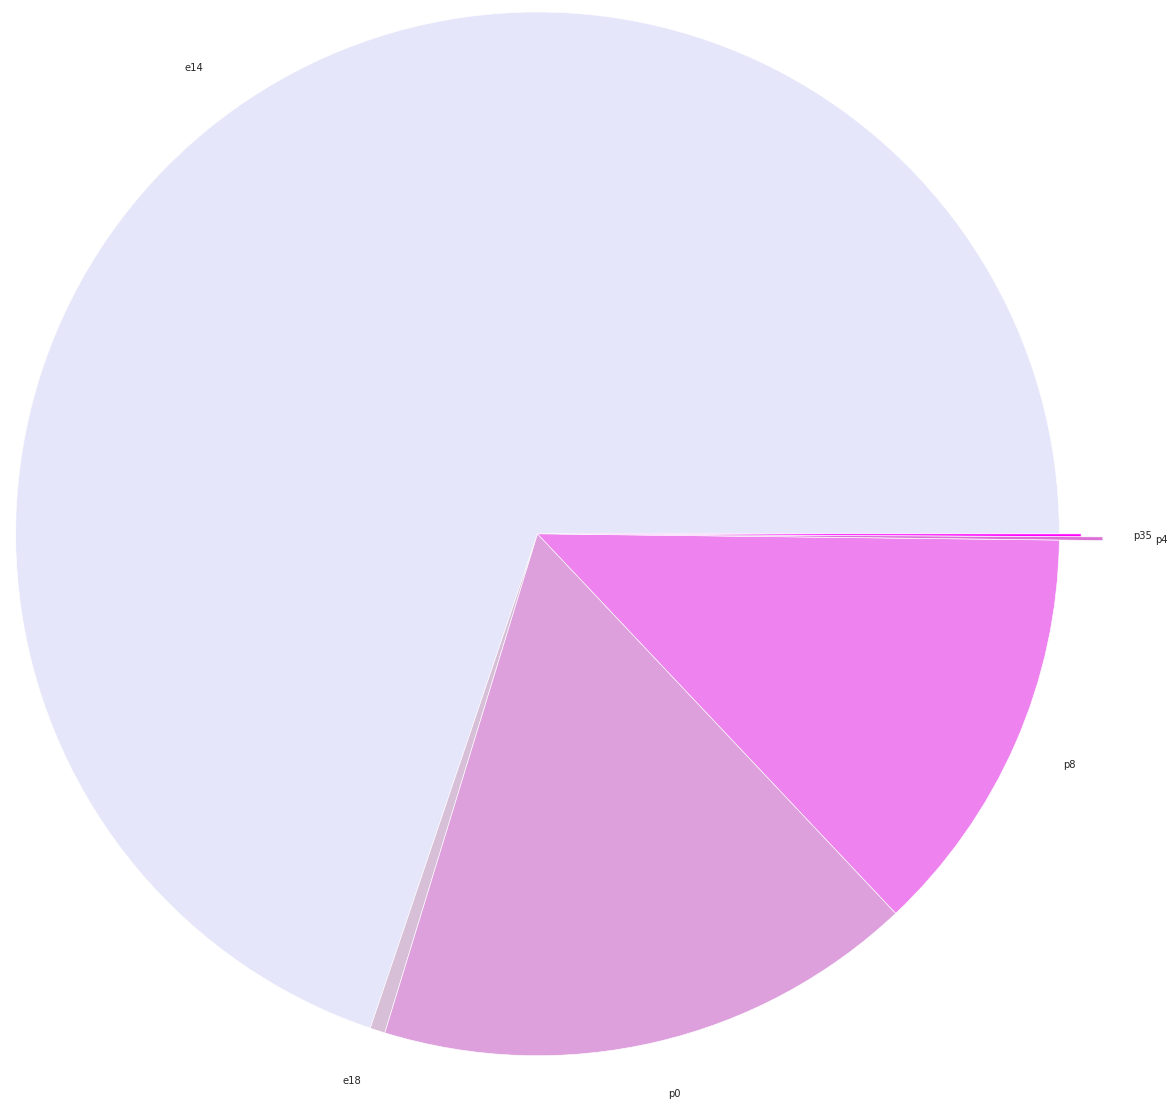

In [135]:
plt.pie(props,radius=6,wedgeprops = { 'linewidth' : 0.6, 'edgecolor' : 'white' },labels=human_classified.obs['SCN_class'].unique(),explode=[0,0,0,0,0.5,0.25],colors = ['#E6E6FA', '#D8BFD8', '#DDA0DD', '#EE82EE', '#DA70D6', '#FF00FF'])
#plt.title('Proportion of Human Cells in Classified Developmental Phase')
#plt.legend(labels=human_classified.obs['SCN_class'].unique(), loc='lower left')
from google.colab import files
plt.savefig("piechart.png")
files.download("piechart.png")